# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


##  Изучение данных из файлов 

In [1]:
import pandas as pd# импорт библиотеки pandas
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import random
pd.set_option('display.max_columns', None)

**Описание таблиц**

* `users` — информация о пользователях;
* `calls` - информация о звонках;
* `messages` - информация о сообщениях;
* `internet` — информация об интернет-сессиях;
* `tariffs` — информация о тарифах;


**Информация по таблице users**

In [2]:
#информация по таблице users
users=pd.read_csv('/datasets/users.csv')# чтение файла с данными и сохранение в user
users.head(10)# получение первых 10 строк таблицы 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [3]:
users.info()# получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Описание данных**

В таблице восемь столбцов

* `user_id` — уникальный идентификатор пользователя;
* `first_name` - имя пользователя;
* `last_name` - фамилия пользователя;
* `age` — возраст пользователя (годы);
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* `city` — город проживания пользователя;
* `tarif` — название тарифного плана;

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

In [4]:
display(users['churn_date'].unique())# проверка даты прекращения использования тарифа
display(users['churn_date'].value_counts())# подсчет количества даты прекращения использования тарифа

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

2018-12-21    2
2018-12-09    2
2018-10-03    2
2018-10-14    2
2018-12-03    2
2018-12-14    1
2018-08-31    1
2018-12-11    1
2018-11-27    1
2018-12-18    1
2018-11-13    1
2018-11-21    1
2018-10-05    1
2018-09-27    1
2018-09-26    1
2018-12-16    1
2018-10-25    1
2018-12-20    1
2018-11-07    1
2018-12-23    1
2018-10-27    1
2018-11-16    1
2018-12-25    1
2018-12-26    1
2018-10-04    1
2018-08-17    1
2018-11-30    1
2018-09-02    1
2018-11-26    1
2018-12-30    1
2018-10-28    1
2018-12-24    1
2018-11-22    1
Name: churn_date, dtype: int64

In [5]:
display (users.loc[users['churn_date']=='2018-12-31'].head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


**Информация по таблице calls**

In [6]:
calls=pd.read_csv('/datasets/calls.csv')# чтение файла с данными и сохранение в calls
calls.head(10)# получение первых 10 строк таблицы 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [7]:
calls.info()# получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Описание данных**

В таблице четыре столбца

* `id` — уникальный номер звонка;
* `call_date` - дата звонка;
* `duration` - длительность звонка в минутах;
* `user_id` — идентификатор пользователя, сделавшего звонок;

Количество значений в столбцах совпадают. Значит, в данных нет пропущенные значения.

**Информация по таблице messages**

In [8]:
#информация по таблице messages
messages=pd.read_csv('/datasets/messages.csv')# чтение файла с данными и сохранение в messages
messages.head(10)# получение первых 10 строк таблицы 

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
messages.info()# получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Описание данных**

В таблице четыре столбца

* `id` — уникальный номер сообщения;
* `message_date` - дата сообщения;
* `user_id` — идентификатор пользователя;

Количество значений в столбцах совпадают. Значит, в данных нет пропущенные значения.

**Информация по таблице internet**

In [10]:
#информация по таблице internet
internet=pd.read_csv('/datasets/internet.csv')# чтение файла с данными и сохранение в internet
internet.head(10)# получение первых 10 строк таблицы 


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [11]:
internet.info()# получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Описание данных**

В таблице пять столбцов

* `Unnamed: 0` - столбец без имени;
* `id` — уникальный номер сессии;
* `mb_used` - объём потраченного за сессию интернет-трафика (в мегабайтах);
* `session_date` — дата интернет-сессии;
* `user_id` — идентификатор пользователя;

Количество значений в столбцах совпадают. Значит, в данных нет пропущенные значения.

**Информация по таблице tariffs**

In [12]:
#информация по таблице tariffs
tariffs=pd.read_csv('/datasets/tariffs.csv')# чтение файла с данными и сохранение в tariffs
tariffs.head(10)# получение первых 10 строк таблицы 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()# получение общей информации о данных в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Описание данных**

В таблице восемь столбцов

* `tariff_name` - название тарифа;
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
* `minutes_included` - количество минут разговора в месяц, включённых в абонентскую плату;
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета;
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Количество значений в столбцах совпадают. Значит, в данных нет пропущенные значения.

### Вывод

1. Количество значений в столбцах различается в таблице `users`. Значит, в данных есть пропущенные значения. В качестве замены пропусков можно использовать послений день года т.е. 2018-12-31 т.к рассматриваем диапазон времени в рамках 2018 года и такой даты прекращения пользования тарифом нет.
2. Названия некоторых столбцов не соответствуют правилам написания
3. Тип некоторых столбцов не соответсвует описанию, в частности столбцы связанные с датой звонка, сообщения, окончание пользования тарифом




Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных.


## Предобработка данных

In [14]:
#Количество пропущенных значений в 'churn_date'
display(len(users[users['churn_date'].isna()]))


462

In [15]:
#Имеется 462 значения заменим на 2018-12-31
users['churn_date'] = users['churn_date'].fillna('2018-12-31')
display (users.head(10))# получение первых 10 строк таблицы 
#проверка замены 
display(len(users[users['churn_date'].isna()]))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,2018-12-31,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,2018-12-31,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,2018-12-31,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,2018-12-31,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,2018-12-31,Пермь,Василиса,Блинова,2018-03-22,smart


0

In [16]:
#переводим столбцы 'churn_date' и 'reg_date' таблицы users в даты 
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()
#display (users.head(10))# получение первых 10 строк таблицы 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [17]:
#переводим столбцы 'call_date' таблицы 'calls' в даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [18]:
#переводим столбцы 'message_date' таблицы 'messages' в даты
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [19]:
#переводим столбцы 'session_date' таблицы 'internet' в даты
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()
display(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [20]:
#добавляем в талицу столбец с месяцами
calls['month']=calls['call_date'].dt.strftime('%m')
display(calls.head())
calls.info()
calls['duration']=(calls['duration'].apply(np.ceil))
display(calls.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,07
1,1000_1,2018-08-17,0.00,1000,08
2,1000_2,2018-06-11,2.85,1000,06
3,1000_3,2018-09-21,13.80,1000,09
4,1000_4,2018-12-15,5.18,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,07
1,1000_1,2018-08-17,0.0,1000,08
2,1000_2,2018-06-11,3.0,1000,06
3,1000_3,2018-09-21,14.0,1000,09
4,1000_4,2018-12-15,6.0,1000,12


In [21]:
#считаем количество звонков по месяцам для каждого клиента
calls_month_pivot = calls.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
#переименовываем  столбец
calls_month_pivot.columns = ['calls_sum']
display(calls_month_pivot)
#считаем количество израсходованных минут по месяцам для каждого клиента
calls_duration_pivot = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc='sum')
#переименовываем  столбец
calls_duration_pivot.columns = ['duration_sum']
display(calls_duration_pivot)


calls_sum
user_id month           
1000    05            22
        06            43
        07            47
        08            52
        09            58
...                  ...
1498    10            41
1499    09             9
        10            68
        11            74
        12            69

[3174 rows x 1 columns]

duration_sum
user_id month              
1000    05            159.0
        06            172.0
        07            340.0
        08            408.0
        09            466.0
...                     ...
1498    10            247.0
1499    09             70.0
        10            449.0
        11            612.0
        12            492.0

[3174 rows x 1 columns]

In [22]:
#объединяем две таблицы по индексам
calls_pivot_table=pd.merge(calls_month_pivot,calls_duration_pivot,right_index=True, left_index=True)
display(calls_pivot_table)


calls_sum  duration_sum
user_id month                         
1000    05            22         159.0
        06            43         172.0
        07            47         340.0
        08            52         408.0
        09            58         466.0
...                  ...           ...
1498    10            41         247.0
1499    09             9          70.0
        10            68         449.0
        11            74         612.0
        12            69         492.0

[3174 rows x 2 columns]

In [23]:
calls_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, '05') to (1499, '12')
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calls_sum     3174 non-null   int64  
 1   duration_sum  3174 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 192.0+ KB


In [24]:
#добавляем в талицу столбец с месяцами
messages['month']=messages['message_date'].dt.strftime('%m')
display(messages.head())
messages.info()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,06
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,08
3,1000_3,2018-06-16,1000,06
4,1000_4,2018-12-05,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ MB


In [25]:
#считаем количество сообщений по месяцам для каждого клиента
messages_month_pivot = messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
#переименовываем  столбец
messages_month_pivot.columns = ['messages_sum']
display(messages_month_pivot)


messages_sum
user_id month              
1000    05               22
        06               60
        07               75
        08               81
        09               57
...                     ...
1498    10               42
1499    09               11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

In [26]:
#добавляем в талицу столбец с месяцами
internet['month']=internet['session_date'].dt.strftime('%m')
display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,09
2,2,1000_2,1197.26,2018-06-25,1000,06
3,3,1000_3,550.27,2018-08-22,1000,08
4,4,1000_4,302.56,2018-09-24,1000,09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.8+ MB


In [27]:
#считаем количество трафика по месяцам для каждого клиента
internet_month_pivot = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
#переименовываем  столбец
internet_month_pivot.columns = ['internet_sum']
display(internet_month_pivot)

internet_sum
user_id month              
1000    05          2253.49
        06         23233.77
        07         14003.64
        08         14055.93
        09         14568.91
...                     ...
1498    10         20579.36
1499    09          1845.75
        10         17788.51
        11         17963.31
        12         13055.58

[3203 rows x 1 columns]

In [28]:
internet_month_pivot['internet_sum_gb']=((internet_month_pivot['internet_sum']/1024))
internet_month_pivot['internet_sum_gb_round']=((internet_month_pivot['internet_sum_gb']).apply(np.ceil))


display(internet_month_pivot)

internet_sum  internet_sum_gb  internet_sum_gb_round
user_id month                                                      
1000    05          2253.49         2.200674                    3.0
        06         23233.77        22.689229                   23.0
        07         14003.64        13.675430                   14.0
        08         14055.93        13.726494                   14.0
        09         14568.91        14.227451                   15.0
...                     ...              ...                    ...
1498    10         20579.36        20.097031                   21.0
1499    09          1845.75         1.802490                    2.0
        10         17788.51        17.371592                   18.0
        11         17963.31        17.542295                   18.0
        12         13055.58        12.749590                   13.0

[3203 rows x 3 columns]

In [29]:
#добавляем столбец tariff_id в users
tariff_id=[]
tariff=0
for i in range(len(users)):
    if users.loc[i,'tariff']=='ultra':
        tariff=0
        tariff_id.append(tariff)
    else:
        tariff=1
        tariff_id.append(tariff)
   
users['tariff_id']=tariff_id
display(users)

users_tariff_pivot=users.pivot_table(index=['user_id','tariff','city'], values='tariff_id')
display(users_tariff_pivot)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,1
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,1
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,0
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0
...,...,...,...,...,...,...,...,...,...
495,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra,0
496,1496,36,2018-12-31,Вологда,Трифон,Блохин,2018-01-27,smart,1
497,1497,32,2018-12-31,Челябинск,Каролина,Агеева,2018-10-09,smart,1
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,1


,,,tariff_id
user_id,tariff,city,
1000,ultra,Краснодар,0
1001,smart,Москва,1
1002,smart,Стерлитамак,1
1003,ultra,Москва,0
1004,ultra,Новокузнецк,0
...,...,...,...
1495,ultra,Иркутск,0
1496,smart,Вологда,1
1497,smart,Челябинск,1


In [30]:

users_table1=pd.merge(calls_pivot_table,messages_month_pivot,how='left', right_index=True, left_index=True)
display(users_table1)
users_table1.info()

users_table2=pd.merge(users_table1,internet_month_pivot,how='right',right_index=True, left_index=True)
display(users_table2)
users_table=pd.merge(users_table2,users_tariff_pivot,right_index=True, left_index=True)
display(users_table)

calls_sum  duration_sum  messages_sum
user_id month                                       
1000    05            22         159.0          22.0
        06            43         172.0          60.0
        07            47         340.0          75.0
        08            52         408.0          81.0
        09            58         466.0          57.0
...                  ...           ...           ...
1498    10            41         247.0          42.0
1499    09             9          70.0          11.0
        10            68         449.0          48.0
        11            74         612.0          59.0
        12            69         492.0          66.0

[3174 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, '05') to (1499, '12')
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calls_sum     3174 non-null   int64  
 1   duration_sum  3174 non-null   float64
 2   messages_sum  2678 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 216.8+ KB


calls_sum  duration_sum  messages_sum  internet_sum  \
user_id month                                                        
1000    05          22.0         159.0          22.0       2253.49   
        06          43.0         172.0          60.0      23233.77   
        07          47.0         340.0          75.0      14003.64   
        08          52.0         408.0          81.0      14055.93   
        09          58.0         466.0          57.0      14568.91   
...                  ...           ...           ...           ...   
1498    10          41.0         247.0          42.0      20579.36   
1499    09           9.0          70.0          11.0       1845.75   
        10          68.0         449.0          48.0      17788.51   
        11          74.0         612.0          59.0      17963.31   
        12          69.0         492.0          66.0      13055.58   

               internet_sum_gb  internet_sum_gb_round  
user_id month                                          
1000    05            2.200674                    3.0  
        06           22.689229                   23.0  
        07           13.675430                   14.0  
        08           13.726494                   14.0  
        09           14.227451                   15.0  
...                        ...                    ...  
1498    10           20.097031                   21.0  
1499    09            1.802490                    2.0  
        10           17.371592                   18.0  
        11           17.542295                   18.0  
        12           12.749590                   13.0  

[3203 rows x 6 columns]

calls_sum  duration_sum  messages_sum  \
user_id month tariff city                                                 
1000    05    ultra  Краснодар         22.0         159.0          22.0   
        06    ultra  Краснодар         43.0         172.0          60.0   
        07    ultra  Краснодар         47.0         340.0          75.0   
        08    ultra  Краснодар         52.0         408.0          81.0   
        09    ultra  Краснодар         58.0         466.0          57.0   
...                                     ...           ...           ...   
1498    10    smart  Владикавказ       41.0         247.0          42.0   
1499    09    smart  Пермь              9.0          70.0          11.0   
        10    smart  Пермь             68.0         449.0          48.0   
        11    smart  Пермь             74.0         612.0          59.0   
        12    smart  Пермь             69.0         492.0          66.0   

                                  internet_sum  internet_sum_gb  \
user_id month tariff city                                         
1000    05    ultra  Краснодар         2253.49         2.200674   
        06    ultra  Краснодар        23233.77        22.689229   
        07    ultra  Краснодар        14003.64        13.675430   
        08    ultra  Краснодар        14055.93        13.726494   
        09    ultra  Краснодар        14568.91        14.227451   
...                                        ...              ...   
1498    10    smart  Владикавказ      20579.36        20.097031   
1499    09    smart  Пермь             1845.75         1.802490   
        10    smart  Пермь            17788.51        17.371592   
        11    smart  Пермь            17963.31        17.542295   
        12    smart  Пермь            13055.58        12.749590   

                                  internet_sum_gb_round  tariff_id  
user_id month tariff city                                           
1000    05    ultra  Краснодар                      3.0          0  
        06    ultra  Краснодар                     23.0          0  
        07    ultra  Краснодар                     14.0          0  
        08    ultra  Краснодар                     14.0          0  
        09    ultra  Краснодар                     15.0          0  
...                                                 ...        ...  
1498    10    smart  Владикавказ                   21.0          1  
1499    09    smart  Пермь                          2.0          1  
        10    smart  Пермь                         18.0          1  
        11    smart  Пермь                         18.0          1  
        12    smart  Пермь                         13.0          1  

[3203 rows x 7 columns]

In [31]:
display(len(users_table['tariff_id']))
users_table.info()

3203

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, '05', 'ultra', 'Краснодар') to (1499, '12', 'smart', 'Пермь')
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   calls_sum              3163 non-null   float64
 1   duration_sum           3163 non-null   float64
 2   messages_sum           2667 non-null   float64
 3   internet_sum           3203 non-null   float64
 4   internet_sum_gb        3203 non-null   float64
 5   internet_sum_gb_round  3203 non-null   float64
 6   tariff_id              3203 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 211.8+ KB


In [32]:
#Количество пропущенных значений в 'calls_sum'
display(len(users_table[users_table['calls_sum'].isna()]))
#Количество пропущенных значений в 'messages_sum'
display(len(users_table[users_table['messages_sum'].isna()]))

40

536

In [33]:
# 40 значений 'calls_sum'  заменим на 0
# 40 значений 'duration_sum '  заменим на 0
# 539 значений 'messages_sum'  заменим на 0
users_table['calls_sum'] = users_table['calls_sum'].fillna(0)
users_table['duration_sum'] = users_table['duration_sum'].fillna(0)
users_table['messages_sum'] = users_table['messages_sum'].fillna(0) 
#проверка замены 
display(len(users_table[users_table['calls_sum'].isna()]))
display(len(users_table[users_table['duration_sum'].isna()]))
display(len(users_table[users_table['messages_sum'].isna()]))
users_table.info()

0

0

0

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, '05', 'ultra', 'Краснодар') to (1499, '12', 'smart', 'Пермь')
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   calls_sum              3203 non-null   float64
 1   duration_sum           3203 non-null   float64
 2   messages_sum           3203 non-null   float64
 3   internet_sum           3203 non-null   float64
 4   internet_sum_gb        3203 non-null   float64
 5   internet_sum_gb_round  3203 non-null   float64
 6   tariff_id              3203 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 211.8+ KB


In [34]:
users_table_work=users_table.reset_index()

In [35]:
display(users_table_work)

,user_id,month,tariff,city,calls_sum,duration_sum,messages_sum,internet_sum,internet_sum_gb,internet_sum_gb_round,tariff_id
0,1000,05,ultra,Краснодар,22.0,159.0,22.0,2253.49,2.200674,3.0,0
1,1000,06,ultra,Краснодар,43.0,172.0,60.0,23233.77,22.689229,23.0,0
2,1000,07,ultra,Краснодар,47.0,340.0,75.0,14003.64,13.675430,14.0,0
3,1000,08,ultra,Краснодар,52.0,408.0,81.0,14055.93,13.726494,14.0,0
4,1000,09,ultra,Краснодар,58.0,466.0,57.0,14568.91,14.227451,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10,smart,Владикавказ,41.0,247.0,42.0,20579.36,20.097031,21.0,1
3199,1499,09,smart,Пермь,9.0,70.0,11.0,1845.75,1.802490,2.0,1
3200,1499,10,smart,Пермь,68.0,449.0,48.0,17788.51,17.371592,18.0,1
3201,1499,11,smart,Пермь,74.0,612.0,59.0,17963.31,17.542295,18.0,1


In [36]:
#Забиваем столбцы profit 0 из предположения, что выгоды нет. 
#Если по срезам получится что что-то изменилось, то заменим значение
users_table_work.loc[:,'profit_calls']=0
users_table_work.loc[:,'profit_messages']=0
users_table_work.loc[:,'profit_internet']=0


profit_calls=0
profit_messages=0
profit_internet=0
for i in range(len(users_table_work)):
    if (users_table_work.loc[i,'tariff']=='ultra')& (users_table_work.loc[i,'duration_sum']>3000):
        profit_calls+=(users_table_work.loc[i,'duration_sum']-3000)*1
        #profit_calls_ultra.append(profit_calls)
        users_table_work.loc[i,'profit_calls']=profit_calls
        profit_calls=0
    if (users_table_work.loc[i,'tariff']=='ultra')& (users_table_work.loc[i,'messages_sum']>1000):
        profit_messages+=(users_table_work.loc[i,'messages_sum']-1000)*1
        #profit_messages_ultra.append(profit_messages)
        users_table_work.loc[i,'profit_messages']=profit_messages
        profit_messages=0
    if (users_table_work.loc[i,'tariff']=='ultra')& (users_table_work.loc[i,'internet_sum_gb_round']>30):
        profit_internet+=(users_table_work.loc[i,'internet_sum_gb_round']-30)*150
        users_table_work.loc[i,'profit_internet']=profit_internet
        profit_internet=0

profit_calls=0
profit_messages=0
profit_internet=0
for i in range(len(users_table_work)):
    if (users_table_work.loc[i,'tariff']=='smart')& (users_table_work.loc[i,'duration_sum']>500):
        profit_calls+=(users_table_work.loc[i,'duration_sum']-500)*3
        
        users_table_work.loc[i,'profit_calls']=profit_calls
        profit_calls=0
    if (users_table_work.loc[i,'tariff']=='smart')& (users_table_work.loc[i,'messages_sum']>50):
        profit_messages+=(users_table_work.loc[i,'messages_sum']-50)*3
        
        users_table_work.loc[i,'profit_messages']=profit_messages
        profit_messages=0
    if (users_table_work.loc[i,'tariff']=='smart')& (users_table_work.loc[i,'internet_sum_gb_round']>15):
        profit_internet+=(users_table_work.loc[i,'internet_sum_gb_round']-15)*200
        users_table_work.loc[i,'profit_internet']=profit_internet
        profit_internet=0

for i in range(len(users_table_work)):
    if (users_table_work.loc[i,'tariff']=='ultra'):
        users_table_work.loc[i,'profit_tariff']=users_table_work.loc[i,'profit_calls']+users_table_work.loc[i,'profit_messages']+users_table_work.loc[i,'profit_internet']+1950
    else:
         if (users_table_work.loc[i,'tariff']=='smart'):
                users_table_work.loc[i,'profit_tariff']=users_table_work.loc[i,'profit_calls']+users_table_work.loc[i,'profit_messages']+users_table_work.loc[i,'profit_internet']+550
   
        
display(users_table_work)

,user_id,month,tariff,city,calls_sum,duration_sum,messages_sum,internet_sum,internet_sum_gb,internet_sum_gb_round,tariff_id,profit_calls,profit_messages,profit_internet,profit_tariff
0,1000,05,ultra,Краснодар,22.0,159.0,22.0,2253.49,2.200674,3.0,0,0.0,0.0,0.0,1950.0
1,1000,06,ultra,Краснодар,43.0,172.0,60.0,23233.77,22.689229,23.0,0,0.0,0.0,0.0,1950.0
2,1000,07,ultra,Краснодар,47.0,340.0,75.0,14003.64,13.675430,14.0,0,0.0,0.0,0.0,1950.0
3,1000,08,ultra,Краснодар,52.0,408.0,81.0,14055.93,13.726494,14.0,0,0.0,0.0,0.0,1950.0
4,1000,09,ultra,Краснодар,58.0,466.0,57.0,14568.91,14.227451,15.0,0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10,smart,Владикавказ,41.0,247.0,42.0,20579.36,20.097031,21.0,1,0.0,0.0,1200.0,1750.0
3199,1499,09,smart,Пермь,9.0,70.0,11.0,1845.75,1.802490,2.0,1,0.0,0.0,0.0,550.0
3200,1499,10,smart,Пермь,68.0,449.0,48.0,17788.51,17.371592,18.0,1,0.0,0.0,600.0,1150.0
3201,1499,11,smart,Пермь,74.0,612.0,59.0,17963.31,17.542295,18.0,1,336.0,27.0,600.0,1513.0


### Вывод

1. Заменили в таблице `users` пропуски на `2018-12-31`
2. Поменяли тип столбцов связанных со временем во всех таблицах
3. Добавили столбец с месяцем для каждой таблицы
4. Все собрали с помощь pivot_table  в одну таблицу
5. Рассчитали сколько тратит каждый пользователь по тарифам и какой доход по тарифу у компании



## Анализ данных

#### Работаем с тарифом smart

In [37]:
calls_group_smart=users_table_work.query('tariff=="smart"').reset_index(drop=True)

display(calls_group_smart)
calls_group_smart['month']=calls_group_smart['month'].astype('int')
display(calls_group_smart)

,user_id,month,tariff,city,calls_sum,duration_sum,messages_sum,internet_sum,internet_sum_gb,internet_sum_gb_round,tariff_id,profit_calls,profit_messages,profit_internet,profit_tariff
0,1001,11,smart,Москва,59.0,430.0,0.0,18429.34,17.997402,18.0,1,0.0,0.0,600.0,1150.0
1,1001,12,smart,Москва,63.0,414.0,0.0,14036.66,13.707676,14.0,1,0.0,0.0,0.0,550.0
2,1002,06,smart,Стерлитамак,15.0,117.0,4.0,10856.82,10.602363,11.0,1,0.0,0.0,0.0,550.0
3,1002,07,smart,Стерлитамак,26.0,214.0,11.0,17580.10,17.168066,18.0,1,0.0,0.0,600.0,1150.0
4,1002,08,smart,Стерлитамак,42.0,289.0,13.0,20319.26,19.843027,20.0,1,0.0,0.0,1000.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,1498,10,smart,Владикавказ,41.0,247.0,42.0,20579.36,20.097031,21.0,1,0.0,0.0,1200.0,1750.0
2224,1499,09,smart,Пермь,9.0,70.0,11.0,1845.75,1.802490,2.0,1,0.0,0.0,0.0,550.0
2225,1499,10,smart,Пермь,68.0,449.0,48.0,17788.51,17.371592,18.0,1,0.0,0.0,600.0,1150.0
2226,1499,11,smart,Пермь,74.0,612.0,59.0,17963.31,17.542295,18.0,1,336.0,27.0,600.0,1513.0


,user_id,month,tariff,city,calls_sum,duration_sum,messages_sum,internet_sum,internet_sum_gb,internet_sum_gb_round,tariff_id,profit_calls,profit_messages,profit_internet,profit_tariff
0,1001,11,smart,Москва,59.0,430.0,0.0,18429.34,17.997402,18.0,1,0.0,0.0,600.0,1150.0
1,1001,12,smart,Москва,63.0,414.0,0.0,14036.66,13.707676,14.0,1,0.0,0.0,0.0,550.0
2,1002,6,smart,Стерлитамак,15.0,117.0,4.0,10856.82,10.602363,11.0,1,0.0,0.0,0.0,550.0
3,1002,7,smart,Стерлитамак,26.0,214.0,11.0,17580.10,17.168066,18.0,1,0.0,0.0,600.0,1150.0
4,1002,8,smart,Стерлитамак,42.0,289.0,13.0,20319.26,19.843027,20.0,1,0.0,0.0,1000.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,1498,10,smart,Владикавказ,41.0,247.0,42.0,20579.36,20.097031,21.0,1,0.0,0.0,1200.0,1750.0
2224,1499,9,smart,Пермь,9.0,70.0,11.0,1845.75,1.802490,2.0,1,0.0,0.0,0.0,550.0
2225,1499,10,smart,Пермь,68.0,449.0,48.0,17788.51,17.371592,18.0,1,0.0,0.0,600.0,1150.0
2226,1499,11,smart,Пермь,74.0,612.0,59.0,17963.31,17.542295,18.0,1,336.0,27.0,600.0,1513.0


In [38]:
display(len(calls_group_smart))

2228

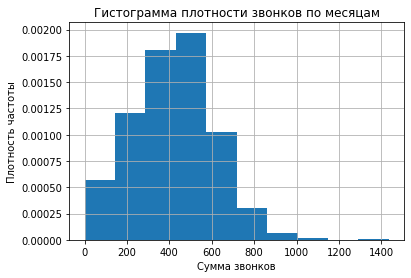

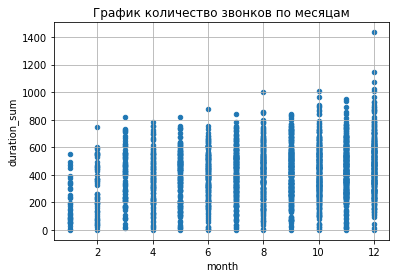

In [39]:
#зависимость количества звонков от месяца

calls_group_smart['duration_sum'].hist(density=True)
plt.title('Гистограмма плотности звонков по месяцам')
plt.xlabel('Сумма звонков')
plt.ylabel('Плотность частоты')
plt.show()
calls_group_smart.plot(x='month', y='duration_sum', kind='scatter',grid=True)
plt.title('График количество звонков по месяцам')
plt.show()

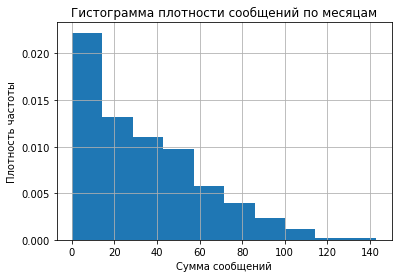

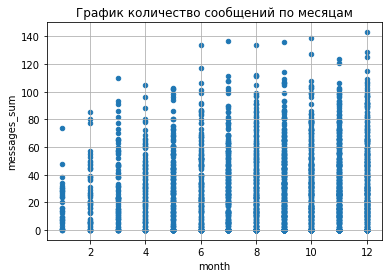

In [40]:
#зависимость количества сообщений от месяца
calls_group_smart['messages_sum'].hist(density=True)
plt.title('Гистограмма плотности сообщений по месяцам')
plt.xlabel('Сумма сообщений')
plt.ylabel('Плотность частоты')
plt.show()
calls_group_smart.plot(x='month', y='messages_sum', kind='scatter',grid=True)
plt.title('График количество сообщений по месяцам')
plt.show()

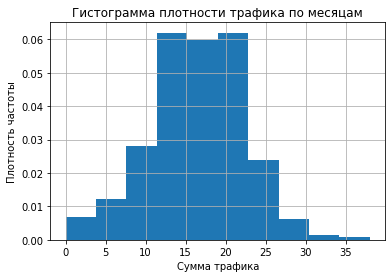

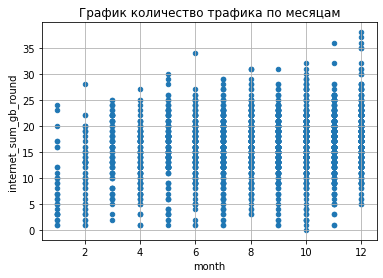

In [41]:
#зависимость количества трафика от месяца
calls_group_smart['internet_sum_gb_round'].hist(density=True)
plt.title('Гистограмма плотности трафика по месяцам')
plt.xlabel('Сумма трафика')
plt.ylabel('Плотность частоты')
plt.show()
calls_group_smart.plot(x='month', y='internet_sum_gb_round', kind='scatter',grid=True)
plt.title('График количество трафика по месяцам')
plt.show()

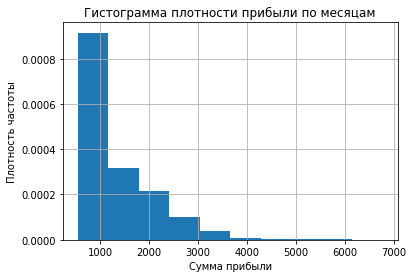

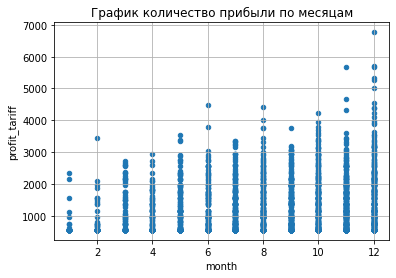

In [42]:
#зависимость прибыли от месяца
calls_group_smart['profit_tariff'].hist(density=True)
plt.title('Гистограмма плотности прибыли по месяцам')
plt.xlabel('Сумма прибыли')
plt.ylabel('Плотность частоты')
plt.show()
calls_group_smart.plot(x='month', y='profit_tariff', kind='scatter',grid=True)
plt.title('График количество прибыли по месяцам')
plt.show()

count    2228.000000
mean     1290.305655
std       818.437830
min       550.000000
25%       550.000000
50%      1026.500000
75%      1750.000000
max      6770.000000
Name: profit_tariff, dtype: float64

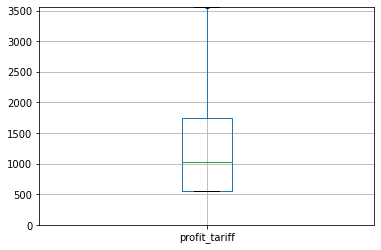

In [43]:
calls_group_smart.boxplot(column=['profit_tariff'])
plt.ylim(0, 3550)
calls_group_smart['profit_tariff'].describe()

,duration_sum
month,
1,203.852941
2,298.689655
3,390.051948
4,367.133929
5,387.361702
6,395.640244
7,408.353234
8,423.055556
9,428.611538


duration_sum    386.892788
dtype: float64

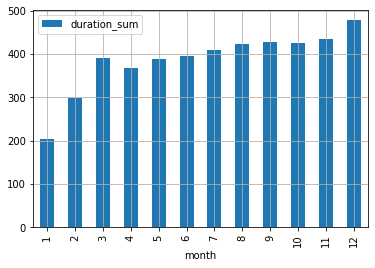

In [44]:
# Среднее значение звонков по месяцам
calls_smart_mean=calls_group_smart.pivot_table(index=['month'], values='duration_sum', aggfunc='mean')
display(calls_smart_mean)
calls_smart_mean.plot(y='duration_sum',kind='bar',grid=True)
# Среднее значение звонков всех месяцев
calls_smart_mean_all=calls_smart_mean.mean()
display(calls_smart_mean_all)

,messages_sum
month,
1,18.235294
2,24.086207
3,31.857143
4,30.741071
5,33.773050
6,33.109756
7,33.751244
8,33.705128
9,33.515385


messages_sum    31.364252
dtype: float64

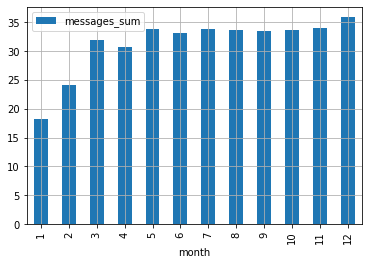

In [45]:
# Среднее значение сообщений по месяцам
messages_smart_mean=calls_group_smart.pivot_table(index=['month'], values='messages_sum', aggfunc='mean')
display(messages_smart_mean)
messages_smart_mean.plot(y='messages_sum',kind='bar',grid=True)
# Среднее значение сообщений всех месяцев
messages_smart_mean_all=messages_smart_mean.mean()
display(messages_smart_mean_all)

,internet_sum_gb_round
month,
1,8.735294
2,11.844828
3,15.233766
4,13.625000
5,15.907801
6,15.951220
7,15.875622
8,16.807692
9,16.392308


internet_sum_gb_round    15.204689
dtype: float64

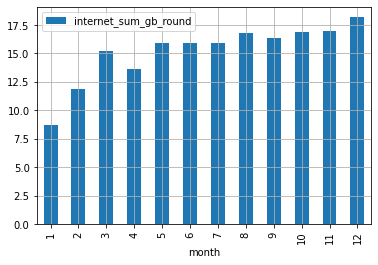

In [46]:
# Среднее значение трафика по месяцам
internet_smart_mean=calls_group_smart.pivot_table(index=['month'], values='internet_sum_gb_round', aggfunc='mean')
display(internet_smart_mean)
internet_smart_mean.plot(y='internet_sum_gb_round',kind='bar',grid=True)
# Среднее значение трафика всех месяцев
internet_smart_mean_all=internet_smart_mean.mean()
display(internet_smart_mean_all)

,profit_tariff
month,
1,721.323529
2,827.603448
3,1164.623377
4,963.089286
5,1197.510638
6,1204.018293
7,1223.950249
8,1323.888889
9,1249.946154


profit_tariff    1180.198852
dtype: float64

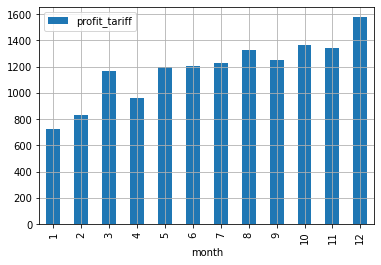

In [47]:
# Среднее значение прибыли по месяцам
profit_smart_mean=calls_group_smart.pivot_table(index=['month'], values='profit_tariff', aggfunc='mean')
display(profit_smart_mean)
profit_smart_mean.plot(y='profit_tariff',kind='bar',grid=True)
# Среднее значение прибыли всех месяцев
profit_smart_mean_all=profit_smart_mean.mean()
display(profit_smart_mean_all)

In [48]:
# Дисперсия по месяцам по звонкам, сообщениям, трафику

variance_smart=pd.DataFrame()
for i in range(1,13):
    variance_number=np.var(calls_group_smart.query('month== @i'))
    #variance_smart.loc[i,'month']=i
    variance_smart.loc[i,'duration']=(variance_number['duration_sum'])
    variance_smart.loc[i,'messages']=(variance_number['messages_sum'])
    variance_smart.loc[i,'internet']=(variance_number['internet_sum_gb_round'])
   
display(variance_smart)

,duration,messages,internet
1,23087.713668,254.650519,38.253460
2,35784.489893,464.940844,36.510404
3,36344.932366,709.161410,32.127172
4,34467.687420,596.763313,31.020089
5,34573.110306,725.806650,34.126251
6,30555.462039,807.305027,31.717133
7,32089.820499,795.908270,33.253187
8,34201.368708,837.353222,28.839086
9,33406.360636,791.903609,25.784556
10,35271.954278,816.654588,32.785147


In [49]:
# Дисперсия по всему рассматриваему периоду для продолжительности, сообщений, трафику, прибыли
variance_smart_duration=(np.var(calls_group_smart['duration_sum']))
display(variance_smart_duration)
variance_smart_messages=(np.var(calls_group_smart['messages_sum']))
display(variance_smart_messages)
variance_smart_internet=(np.var(calls_group_smart['internet_sum_gb_round']))
display(variance_smart_internet)
variance_smart_profit=(np.var(calls_group_smart['profit_tariff']))
display(variance_smart_profit)

36158.52723518045

798.9719682819284

32.908978554322495

669539.8343127215

In [50]:
standard_deviation_smart=np.sqrt(variance_smart)

In [51]:
display(standard_deviation_smart)

,duration,messages,internet
1,151.946417,15.957773,6.184938
2,189.167888,21.562487,6.042384
3,190.643469,26.630085,5.668084
4,185.654753,24.428739,5.569568
5,185.938458,26.940799,5.841768
6,174.801207,28.413114,5.631797
7,179.136318,28.211846,5.766558
8,184.936121,28.937056,5.370204
9,182.774070,28.140782,5.077850
10,187.808291,28.577169,5.725832


In [52]:
# Стандартное отклонение по всему периоду для продолжительности звонков, сообщений, трафика, прибыли
standard_deviation_smart_duration=np.sqrt(variance_smart_duration)
display(standard_deviation_smart_duration)
standard_deviation_smart_messages=np.sqrt(variance_smart_messages)
display(standard_deviation_smart_messages)
standard_deviation_smart_internet=np.sqrt(variance_smart_internet)
display(standard_deviation_smart_internet)
standard_deviation_smart_profit=np.sqrt(variance_smart_profit)
display(standard_deviation_smart_profit)

190.15395666454182

28.266092200407336

5.73663477609674

818.2541379747013

##### Вывод

1. В рассмотренном тарифе происходит увеличение количество звонков, сообщений и трафика к концу года
2. Найдены среднее значения по месяцам для звонков, сообщений и трафика
3. Найдены среднее по всему рассматриваемому периоду:

    Для звонков - 386.892788
    
    Для сообщений - 31.364252
    
    Для трафика -  15.204689
    
    Для прибыли -  1180.198852
    
4. Найдены дисперсия и стандартное отклонение для  звонков, сообщений, трафика и прибыли по месяцам  
5. Найдена дисперсия по всему рассматриваему периоду:
   
    Для звонков - 36158.52723518045

    Для сообщений - 798.9719682819284

    Для трафика - 32.908978554322495

    Для прибыли - 669539.8343127215
6. Найдено стандартное отклонение по всему рассматриваему периоду: 
   
    Для звонков -  190.15395666454182

    Для сообщений -28.266092200407336

    Для трафика -5.73663477609674

    Для прибыли -818.2541379747013
 
4. Построены гистограммы плотности для звонков (скошенность вправо), сообщений(скошенность вправо), трафика (симметричная) и прибыли (скошенность вправо)

#### Работаем с тарифом ultra

In [53]:
calls_group_ultra=users_table_work.query('tariff=="ultra"').reset_index(drop=True)
display(calls_group_ultra)
calls_group_ultra['month']=calls_group_ultra['month'].astype('int')
display(calls_group_ultra)

,user_id,month,tariff,city,calls_sum,duration_sum,messages_sum,internet_sum,internet_sum_gb,internet_sum_gb_round,tariff_id,profit_calls,profit_messages,profit_internet,profit_tariff
0,1000,05,ultra,Краснодар,22.0,159.0,22.0,2253.49,2.200674,3.0,0,0.0,0.0,0.0,1950.0
1,1000,06,ultra,Краснодар,43.0,172.0,60.0,23233.77,22.689229,23.0,0,0.0,0.0,0.0,1950.0
2,1000,07,ultra,Краснодар,47.0,340.0,75.0,14003.64,13.675430,14.0,0,0.0,0.0,0.0,1950.0
3,1000,08,ultra,Краснодар,52.0,408.0,81.0,14055.93,13.726494,14.0,0,0.0,0.0,0.0,1950.0
4,1000,09,ultra,Краснодар,58.0,466.0,57.0,14568.91,14.227451,15.0,0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,1495,08,ultra,Иркутск,17.0,92.0,13.0,2614.07,2.552803,3.0,0,0.0,0.0,0.0,1950.0
971,1495,09,ultra,Иркутск,112.0,813.0,82.0,33067.62,32.292598,33.0,0,0.0,0.0,450.0,2400.0
972,1495,10,ultra,Иркутск,152.0,1030.0,82.0,29363.00,28.674805,29.0,0,0.0,0.0,0.0,1950.0
973,1495,11,ultra,Иркутск,129.0,954.0,79.0,38939.11,38.026475,39.0,0,0.0,0.0,1350.0,3300.0


,user_id,month,tariff,city,calls_sum,duration_sum,messages_sum,internet_sum,internet_sum_gb,internet_sum_gb_round,tariff_id,profit_calls,profit_messages,profit_internet,profit_tariff
0,1000,5,ultra,Краснодар,22.0,159.0,22.0,2253.49,2.200674,3.0,0,0.0,0.0,0.0,1950.0
1,1000,6,ultra,Краснодар,43.0,172.0,60.0,23233.77,22.689229,23.0,0,0.0,0.0,0.0,1950.0
2,1000,7,ultra,Краснодар,47.0,340.0,75.0,14003.64,13.675430,14.0,0,0.0,0.0,0.0,1950.0
3,1000,8,ultra,Краснодар,52.0,408.0,81.0,14055.93,13.726494,14.0,0,0.0,0.0,0.0,1950.0
4,1000,9,ultra,Краснодар,58.0,466.0,57.0,14568.91,14.227451,15.0,0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,1495,8,ultra,Иркутск,17.0,92.0,13.0,2614.07,2.552803,3.0,0,0.0,0.0,0.0,1950.0
971,1495,9,ultra,Иркутск,112.0,813.0,82.0,33067.62,32.292598,33.0,0,0.0,0.0,450.0,2400.0
972,1495,10,ultra,Иркутск,152.0,1030.0,82.0,29363.00,28.674805,29.0,0,0.0,0.0,0.0,1950.0
973,1495,11,ultra,Иркутск,129.0,954.0,79.0,38939.11,38.026475,39.0,0,0.0,0.0,1350.0,3300.0


In [54]:
display(len(calls_group_ultra))

975

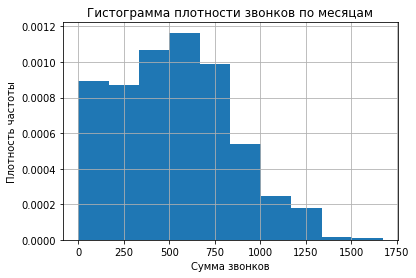

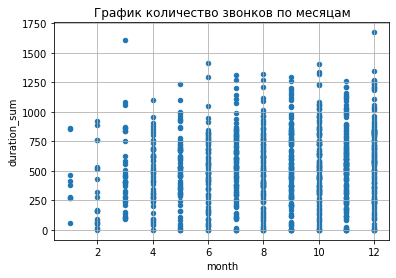

In [55]:
#зависимость количества звонков от месяца
calls_group_ultra['duration_sum'].hist(density=True)
plt.title('Гистограмма плотности звонков по месяцам')
plt.xlabel('Сумма звонков')
plt.ylabel('Плотность частоты')
plt.show()
calls_group_ultra.plot(x='month', y='duration_sum', kind='scatter',grid=True)
plt.title('График количество звонков по месяцам')
plt.show()

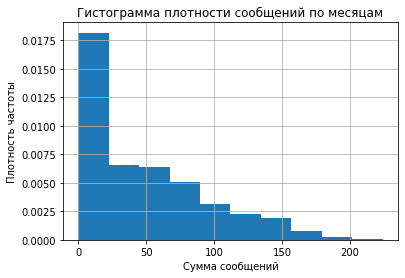

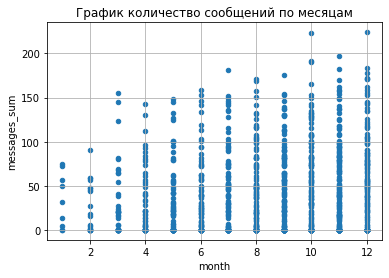

In [56]:
#зависимость количества сообщений от месяца
calls_group_ultra['messages_sum'].hist(density=True)
plt.title('Гистограмма плотности сообщений по месяцам')
plt.xlabel('Сумма сообщений')
plt.ylabel('Плотность частоты')
plt.show()
calls_group_ultra.plot(x='month', y='messages_sum', kind='scatter',grid=True)
plt.title('График количество сообщений по месяцам')
plt.show()
#calls_group_ultra.plot(x='month', y='messages_sum', kind='scatter',grid=True)

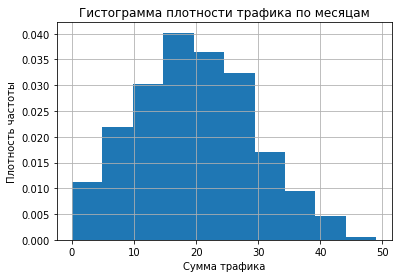

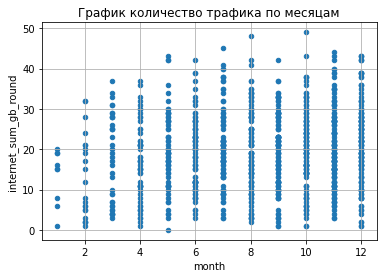

In [57]:
#зависимость количества трафика от месяца
calls_group_ultra['internet_sum_gb_round'].hist(density=True)
plt.title('Гистограмма плотности трафика по месяцам')
plt.xlabel('Сумма трафика')
plt.ylabel('Плотность частоты')
plt.show()
calls_group_ultra.plot(x='month', y='internet_sum_gb_round', kind='scatter',grid=True)
plt.title('График количество трафика по месяцам')
plt.show()
#calls_group_ultra.plot(x='month', y='internet_sum_gb_round', kind='scatter',grid=True)

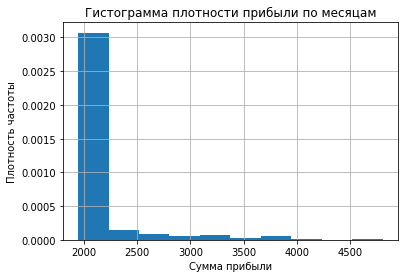

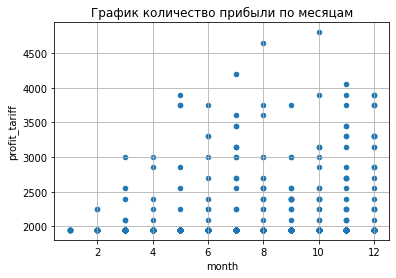

In [58]:
#зависимость количества прибыли от месяца
calls_group_ultra['profit_tariff'].hist(density=True)
plt.title('Гистограмма плотности прибыли по месяцам')
plt.xlabel('Сумма прибыли')
plt.ylabel('Плотность частоты')
plt.show()
calls_group_ultra.plot(x='month', y='profit_tariff', kind='scatter',grid=True)
plt.title('График количество прибыли по месяцам')
plt.show()
#calls_group_ultra.plot(x='month', y='profit_tariff', kind='scatter',grid=True)

count     975.000000
mean     2071.384615
std       377.915268
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: profit_tariff, dtype: float64

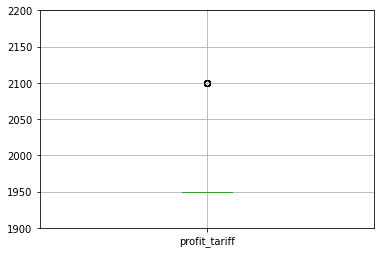

In [59]:
calls_group_ultra.boxplot(column=['profit_tariff'])
plt.ylim(1900, 2200)
calls_group_ultra['profit_tariff'].describe()

,duration_sum
month,
1,428.111111
2,315.409091
3,489.648649
4,458.018182
5,514.727273
6,482.710843
7,549.044444
8,513.207547
9,542.219298


duration_sum    499.316135
dtype: float64

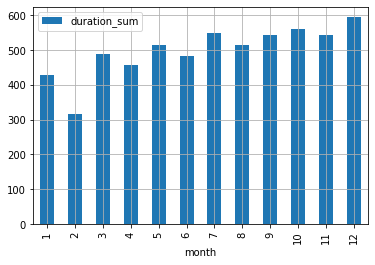

In [60]:
# Среднее значение звонков по месяцам
calls_ultra_mean=calls_group_ultra.pivot_table(index=['month'], values='duration_sum', aggfunc='mean')
display(calls_ultra_mean)
calls_ultra_mean.plot(y='duration_sum',kind='bar',grid=True)
# Среднее значение звонков всех месяцев
calls_ultra_mean_all=calls_ultra_mean.mean()
display(calls_ultra_mean_all)

,messages_sum
month,
1,33.777778
2,23.727273
3,32.297297
4,31.400000
5,36.393939
6,38.626506
7,46.988889
8,46.122642
9,50.166667


messages_sum    42.380931
dtype: float64

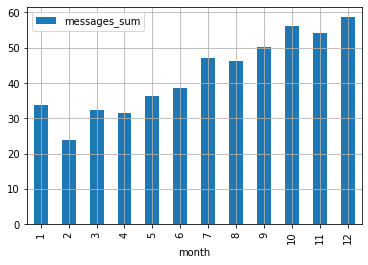

In [61]:
# Среднее значение сообщений по месяцам
messages_ultra_mean=calls_group_ultra.pivot_table(index=['month'], values='messages_sum', aggfunc='mean')
display(messages_ultra_mean)
messages_ultra_mean.plot(y='messages_sum',kind='bar',grid=True)
# Среднее значение сообщений всех месяцев
messages_ultra_mean_all=messages_ultra_mean.mean()
display(messages_ultra_mean_all)

,internet_sum_gb_round
month,
1,13.222222
2,13.090909
3,17.648649
4,16.963636
5,19.666667
6,19.168675
7,20.733333
8,19.783019
9,19.412281


internet_sum_gb_round    18.481028
dtype: float64

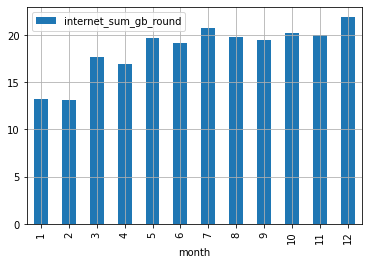

In [62]:
# Среднее значение трафика по месяцам
internet_ultra_mean=calls_group_ultra.pivot_table(index=['month'], values='internet_sum_gb_round', aggfunc='mean')
display(internet_ultra_mean)
internet_ultra_mean.plot(y='internet_sum_gb_round',kind='bar',grid=True)
# Среднее значение трафика всех месяцев
internet_ultra_mean_all=internet_ultra_mean.mean()
display(internet_ultra_mean_all)

,profit_tariff
month,
1,1950.000000
2,1977.272727
3,2014.864865
4,2001.818182
5,2061.363636
6,2040.361446
7,2120.000000
8,2084.433962
9,2025.000000


profit_tariff    2047.947381
dtype: float64

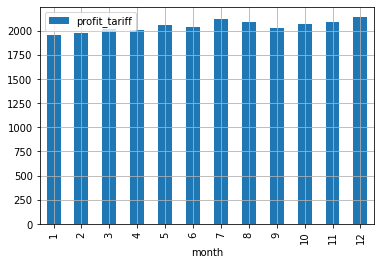

In [63]:
# Среднее значение прибыли по месяцам
profit_ultra_mean=calls_group_ultra.pivot_table(index=['month'], values='profit_tariff', aggfunc='mean')
display(profit_ultra_mean)
profit_ultra_mean.plot(y='profit_tariff',kind='bar',grid=True)
# Среднее значение прибыли всех месяцев
profit_ultra_mean_all=profit_ultra_mean.mean()
display(profit_ultra_mean_all)

In [64]:
#display(np.var(calls_group_ultra.query('month== 1')))
variance_ultra=pd.DataFrame()
for i in range(1,13):
    variance_number=np.var(calls_group_ultra.query('month== @i'))
    #variance_ultra.loc[i,'month']=i
    variance_ultra.loc[i,'duration']=(variance_number['duration_sum'])
    variance_ultra.loc[i,'messages']=(variance_number['messages_sum'])
    variance_ultra.loc[i,'internet']=(variance_number['internet_sum_gb_round'])
   
display(variance_ultra)

,duration,messages,internet
1,64683.876543,836.172840,39.506173
2,87278.059917,711.834711,99.809917
3,108374.498174,1685.560263,111.254931
4,70351.072397,1390.530909,87.816860
5,82573.713499,1676.481175,89.858586
6,90775.675425,1730.499056,78.019742
7,93359.175802,2146.433210,91.706667
8,97323.711641,2073.730242,101.490655
9,104830.679978,2058.261696,82.979147
10,105976.281443,2654.947595,87.930933


In [65]:
# Дисперсия по всему рассматриваему периоду для продолжительности, сообщений, трафику, прибыли
variance_ultra_duration=(np.var(calls_group_ultra['duration_sum']))
display(variance_ultra_duration)
variance_ultra_messages=(np.var(calls_group_ultra['messages_sum']))
display(variance_ultra_messages)
variance_ultra_internet=(np.var(calls_group_ultra['internet_sum_gb_round']))
display(variance_ultra_internet)
variance_ultra_profit=(np.var(calls_group_ultra['profit_tariff']))
display(variance_ultra_profit)

100780.34762813938

2217.3722908612754

94.05017330703484

142673.4674556213

In [66]:
standard_deviation_ultra=np.sqrt(variance_ultra)

In [67]:
display(standard_deviation_ultra)

,duration,messages,internet
1,254.330251,28.916653,6.285394
2,295.428604,26.680231,9.990491
3,329.202822,41.055575,10.547745
4,265.237766,37.289823,9.371065
5,287.356422,40.944855,9.479377
6,301.290019,41.599267,8.832878
7,305.547338,46.329615,9.576360
8,311.967485,45.538228,10.074257
9,323.775663,45.368069,9.109289
10,325.539984,51.526184,9.377149


In [68]:
# Стандартное отклонение по всему периоду для продолжительности звонков, сообщений, трафика, прибыли
standard_deviation_ultra_duration=np.sqrt(variance_ultra_duration)
display(standard_deviation_ultra_duration)
standard_deviation_ultra_messages=np.sqrt(variance_ultra_messages)
display(standard_deviation_ultra_messages)
standard_deviation_ultra_internet=np.sqrt(variance_ultra_internet)
display(standard_deviation_ultra_internet)
standard_deviation_ultra_profit=np.sqrt(variance_ultra_profit)
display(standard_deviation_ultra_profit)

317.4592062425334

47.08898269087234

9.697946860394463

377.7214151403403

##### Вывод

1. В рассмотренном тарифе происходит увеличение количество звонков, сообщений и трафика к концу года
2. Найдены среднее значения по месяцам для звонков, сообщений и трафика
3. Найдены среднее по всему рассматриваемому периоду:

    Для звонков - 499.316135
    
    Для сообщений - 42.380931
    
    Для трафика -  18.481028
    
    Для прибыли -  2047.947381
    
4. Найдены дисперсия и стандартное отклонение для  звонков, сообщений, трафика и прибыли по месяцам  
5. Найдена дисперсия по всему рассматриваему периоду:
   
    Для звонков - 100780.34762813938

    Для сообщений - 2217.3722908612754

    Для трафика - 94.05017330703484

    Для прибыли - 142673.4674556213
    
6. Найдено стандартное отклонение по всему рассматриваему периоду: 
   
    Для звонков -  317.4592062425334

    Для сообщений -47.08898269087234

    Для трафика -9.697946860394463

    Для прибыли -377.7214151403403
 
4. Построены гистограммы плотности для звонков (скошенность вправо), сообщений(скошенность вправо), трафика (симметричная) и прибыли (скошенность вправо)

### Вывод

Провели анализ поведения клиентов в зависимости от месяца пользования выявили следующее:

**Для тарифа `smart`**
1. Среднее время разговора лежит в диапазоне от 200 до 457 мин
2. Среднее количество сообщений от 20 до 43 шт
3. Средний объем трафика от 9 до 18 Гб
4. Средняя прибыль по тарифу увеличивается от 730 до 1500 рублей, медианная прибыль 1026 руб
5. Количество пользователей 2228 пользователей
**Для тарифа `ultra`**
1. Среднее время разговора лежит в диапазоне от 450 до 604 мин
2. Среднее количество сообщений от 43 до 73 шт
3. Средний объем трафика от 14 до 22 Гб
4. Средняя прибыль по тарифу увеличивается от 1950 до 2100  рублей, медианная прибыль 1950 руб
5. Количество пользователей 975  пользователя


## Проверка гипотез

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

Нулевая гипотеза - Проверим гипотезу о равенстве прибыли тарифов «Ультра» и «Смарт»


In [69]:
# выборка по smart
smart=calls_group_smart.loc[:,'profit_tariff']
display(smart)

0       1150.0
1        550.0
2        550.0
3       1150.0
4       1550.0
         ...  
2223    1750.0
2224     550.0
2225    1150.0
2226    1513.0
2227     598.0
Name: profit_tariff, Length: 2228, dtype: float64

In [70]:
# выборка по ultra
ultra=calls_group_ultra.loc[:,'profit_tariff']
display(ultra)

0      1950.0
1      1950.0
2      1950.0
3      1950.0
4      1950.0
        ...  
970    1950.0
971    2400.0
972    1950.0
973    3300.0
974    1950.0
Name: profit_tariff, Length: 975, dtype: float64

In [71]:
alpha = 0.01# критический уровень статистической значимости

#проверьте гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_ind(
    smart, 
    ultra,
    equal_var = False)# выборки большие но не равные поэтому поставили equal_var = False

print('p-значение:',results.pvalue )

if results.pvalue < alpha: # сравните получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.22403940028982e-249
Отвергаем нулевую гипотезу


Значит, можно сделать вывод, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Нулевая гипотеза - Проверим гипотезу о равенстве выручки пользователей из Москвы и из других регионов

In [72]:
# выборка по Москве
display(users_table_work.loc[users_table_work['city']=='Москва'])


,user_id,month,tariff,city,calls_sum,duration_sum,messages_sum,internet_sum,internet_sum_gb,internet_sum_gb_round,tariff_id,profit_calls,profit_messages,profit_internet,profit_tariff
8,1001,11,smart,Москва,59.0,430.0,0.0,18429.34,17.997402,18.0,1,0.0,0.0,600.0,1150.0
9,1001,12,smart,Москва,63.0,414.0,0.0,14036.66,13.707676,14.0,1,0.0,0.0,0.0,550.0
17,1003,08,ultra,Москва,55.0,380.0,37.0,8565.21,8.364463,9.0,0,0.0,0.0,0.0,1950.0
18,1003,09,ultra,Москва,134.0,961.0,91.0,12468.87,12.176631,13.0,0,0.0,0.0,0.0,1950.0
19,1003,10,ultra,Москва,108.0,855.0,83.0,14768.14,14.422012,15.0,0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,1490,08,smart,Москва,45.0,346.0,50.0,17275.37,16.870479,17.0,1,0.0,0.0,400.0,950.0
3148,1490,09,smart,Москва,44.0,322.0,48.0,14816.95,14.469678,15.0,1,0.0,0.0,0.0,550.0
3149,1490,10,smart,Москва,42.0,312.0,45.0,20664.97,20.180635,21.0,1,0.0,0.0,1200.0,1750.0
3150,1490,11,smart,Москва,38.0,282.0,47.0,18712.66,18.274082,19.0,1,0.0,0.0,800.0,1350.0


In [73]:
moscow=(users_table_work.loc[users_table_work['city']=='Москва','profit_tariff']).reset_index(drop=True)

In [74]:
display(moscow)

0      1150.0
1       550.0
2      1950.0
3      1950.0
4      1950.0
        ...  
606     950.0
607     550.0
608    1750.0
609    1350.0
610     750.0
Name: profit_tariff, Length: 611, dtype: float64

In [75]:
# выборка не по Москве
not_moscow=(users_table_work.loc[users_table_work['city']!='Москва','profit_tariff']).reset_index(drop=True)

In [76]:
display(not_moscow)

0       1950.0
1       1950.0
2       1950.0
3       1950.0
4       1950.0
         ...  
2587    1750.0
2588     550.0
2589    1150.0
2590    1513.0
2591     598.0
Name: profit_tariff, Length: 2592, dtype: float64

In [77]:
#учитывая, что должны быт выборки одинаковые случайным образом выберем из выборки not_moscow 
# такое же количестов значений как и в выборке moscow
not_moscow_choice=(random.choices(not_moscow, k=len(moscow)))

In [78]:
alpha = .01 # критический уровень статистической значимости

results = st.ttest_rel(
    moscow, 
    not_moscow_choice)# выборки большие но не равные 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.8229352260951716
Не получилось отвергнуть нулевую гипотезу


Значит, можно сделать вывод, что cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

### Вывод

Проверили следующие гипотезы
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

гипотеза подтвердилась

2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

гипотеза не подтвердилась

## Общий вывод

**В рамках проведенного анализа тарифов "Смарт" и "Ультра" телеком-компании выявил следующее:**
1. При изучении данных были найдены пропущенные значения в таблице `users` столбец `churn_date`. В качестве замены пропусков  использовали последний день года т.е. 2018-12-31 т.к рассматриваем диапазон времени в рамках 2018 года и такой даты прекращения пользования тарифом нет. 
2. Было отмечено, что тип некоторых столбцов не соответствует описанию, в частности столбцы связанные с датой звонка, сообщения, окончание пользования тарифом все это привели в соответствие с типами столбцов. 
3. Добавили столбец с месяцем для каждой таблицы, округлили время разговора каждого пользователя в большую сторону, а также расход трафика.
4. Все собрали с помощь pivot_table  в одну таблицу
5. Рассчитали сколько тратит каждый пользователь по тарифам и какой доход по тарифу у компании от каждого пользователя
6. Рассмотрели каждый тариф по отдельности так для тарифа "Смарт":
   1. Происходит увеличение количество звонков, сообщений и трафика к концу года   
   2. Найдены среднее значения по месяцам для звонков, сообщений и трафика
   3. Найдены среднее значения по всему рассматриваемому периоду:
      1. Для звонков - 386.892788
      2. Для сообщений - 31.364252
      3. Для трафика -  15.204689
      4. Для прибыли -  1180.198852    
   4. Найдены дисперсия и стандартное отклонение для  звонков, сообщений, трафика и прибыли по месяцам  
   5. Найдена дисперсия по всему рассматриваемому периоду:
      1. Для звонков - 36158.52723518045
      2. Для сообщений - 798.97196828192844
      3. Для трафика - 32.908978554322495
      4. Для прибыли - 669539.8343127215
   6. Найдено стандартное отклонение по всему рассматриваемому периоду: 
      1. Для звонков -  190.15395666454182
      2. Для сообщений -28.266092200407336
      3. Для трафика -5.73663477609674
      4. Для прибыли -818.2541379747013
   7. Построены гистограммы плотности для звонков (скошенность вправо), сообщений(скошенность вправо), трафика (симметричная) и прибыли (скошенность вправо)
   8. **Медианная прибыль 1026 руб** с пользователя, количество пользователей **2228** всего прибыль с тарифа **2285928 руб**
7. Рассмотрели каждый тариф по отдельности так для тарифа "Ультра": 
   1. Происходит увеличение количество звонков, сообщений и трафика к концу года
   2. Найдены среднее значения по месяцам для звонков, сообщений и трафика
   3. Найдены среднее значения по всему рассматриваемому периоду:
      1. Для звонков - 499.316135
      2. Для сообщений - 42.380931
      3. Для трафика -  18.481028
      4. Для прибыли -  2047.947381
   4. Найдены дисперсия и стандартное отклонение для  звонков, сообщений, трафика и прибыли по месяцам  
   5. Найдена дисперсия по всему рассматриваемому периоду:
       1. Для звонков - 100780.34762813938
       2. Для сообщений - 2217.3722908612754
       3. Для трафика - 94.05017330703484
       4. Для прибыли - 142673.4674556213
   6. Найдено стандартное отклонение по всему рассматриваемому периоду: 
       1. Для звонков -  317.4592062425334
       2. Для сообщений -47.08898269087234
       3. Для трафика -9.697946860394463
       4. Для прибыли -377.7214151403403
   7. Построены гистограммы плотности для звонков (скошенность вправо), сообщений(скошенность вправо), трафика (симметричная) и прибыли (скошенность вправо)
   8. **Медианная прибыль 1950 руб** с пользователя, количество пользователей **975** всего прибыль с тарифа **1901250 руб**
8. Проверили следующие гипотезы
    1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - 
        **гипотеза подтвердилась**, *т.е средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются*
    2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов -
        **гипотеза не подтвердилась**,*т.е cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов*
9. Из приведенного анализа следует, что тариф "Смарт" для телеком-компании более выгодный, чем тариф "Ультра" при таком количестве пользователей